In [ ]:
from datasets import load_dataset, Dataset
import pandas as pd

In [ ]:
dataset = load_dataset("go_emotions", "simplified")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [ ]:
id2label = dataset['train'].features['labels'].feature.names

In [ ]:
df_train = dataset['train'].to_pandas()
df_test = dataset['test'].to_pandas()
df_valid = dataset['validation'].to_pandas()

ds_train, ds_test, ds_valid = df_train, df_test, df_valid

In [ ]:
df_train['label_names'] = df_train['labels'].apply(lambda ids:[id2label[i] for i in ids])
df_train.head()

,text,labels,id,label_names
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger]
3,To make her feel threatened,[14],ed7ypvh,[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance]


In [ ]:
type(df_train["labels"].iloc[0])

numpy.ndarray

In [ ]:
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
all_label_ids = list(chain.from_iterable(df_train['labels']))
label_counts = Counter(all_label_ids)

label_counts = dict(sorted(label_counts.items()))

label_counts

{np.int64(0): 4130,
 np.int64(1): 2328,
 np.int64(2): 1567,
 np.int64(3): 2470,
 np.int64(4): 2939,
 np.int64(5): 1087,
 np.int64(6): 1368,
 np.int64(7): 2191,
 np.int64(8): 641,
 np.int64(9): 1269,
 np.int64(10): 2022,
 np.int64(11): 793,
 np.int64(12): 303,
 np.int64(13): 853,
 np.int64(14): 596,
 np.int64(15): 2662,
 np.int64(16): 77,
 np.int64(17): 1452,
 np.int64(18): 2086,
 np.int64(19): 164,
 np.int64(20): 1581,
 np.int64(21): 111,
 np.int64(22): 1110,
 np.int64(23): 153,
 np.int64(24): 545,
 np.int64(25): 1326,
 np.int64(26): 1060,
 np.int64(27): 14219}

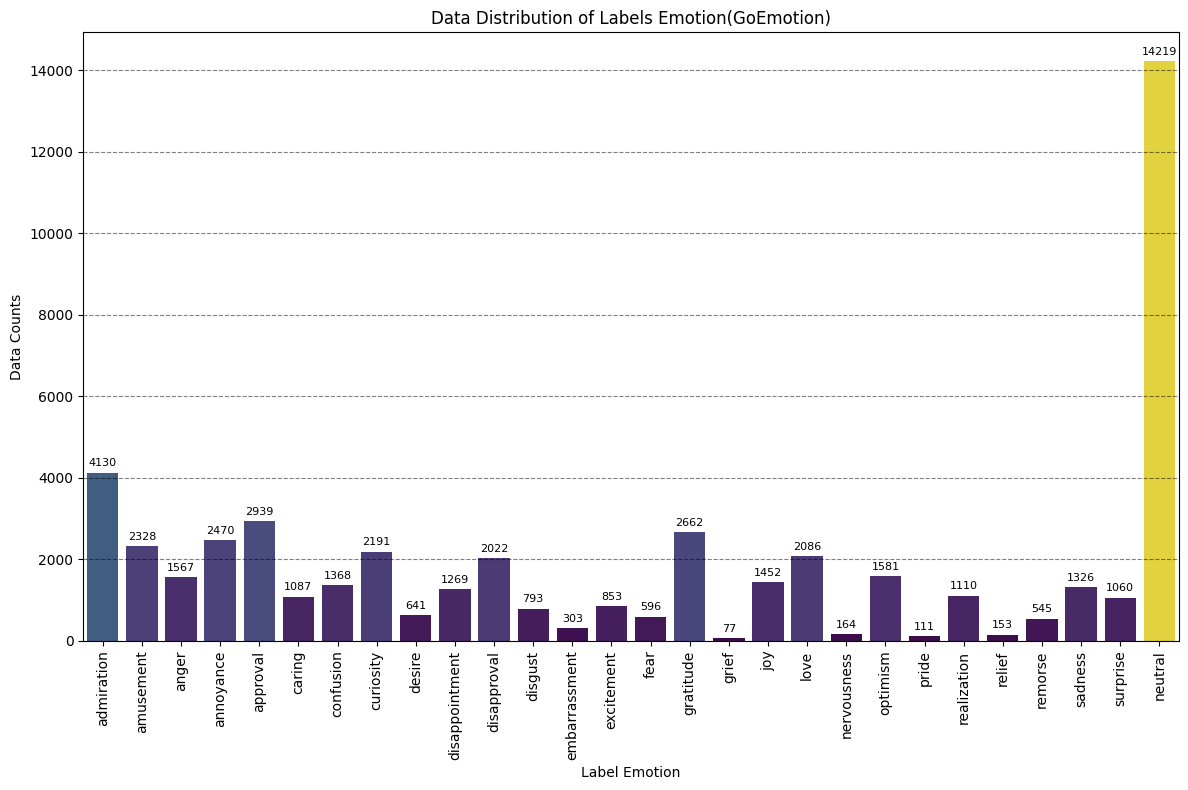

In [ ]:
labels = list(range(len(id2label)))
counts = [label_counts.get(i, 0) for i in labels]
label_names = [id2label[i] for i in labels]

label_freq = pd.DataFrame({
    'labels_id': labels,
    'count' : counts,
    'label_name' : label_names
})

plt.figure(figsize=(12,8))

ax = sns.barplot(data=label_freq, x='label_name', y='count', palette='viridis', hue='count', legend=False)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{int(height)}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset teks
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=90)
plt.xlabel('Label Emotion')
plt.ylabel('Data Counts')
plt.title('Data Distribution of Labels Emotion(GoEmotion)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5, color='black')
plt.show()

In [ ]:
df_train['num_labels'] = df_train['labels'].apply(len)
df_train[['text', 'label_names', 'num_labels']].head(10)

,text,label_names,num_labels
0,My favourite food is anything I didn't have to...,[neutral],1
1,"Now if he does off himself, everyone will thin...",[neutral],1
2,WHY THE FUCK IS BAYLESS ISOING,[anger],1
3,To make her feel threatened,[fear],1
4,Dirty Southern Wankers,[annoyance],1
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[surprise],1
6,Yes I heard abt the f bombs! That has to be wh...,[gratitude],1
7,We need more boards and to create a bit more s...,"[desire, optimism]",2
8,Damn youtube and outrage drama is super lucrat...,[admiration],1
9,It might be linked to the trust factor of your...,[neutral],1


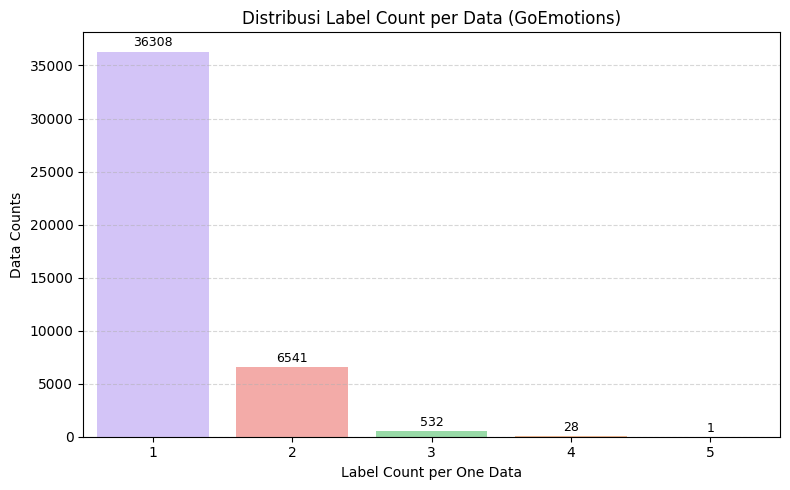

In [ ]:
labels_dist = df_train['num_labels'].value_counts().sort_index().reset_index()
labels_dist.columns = ['Label Counts', 'Data Counts']

plt.figure(figsize=(8, 5))
sns.barplot(data=labels_dist, x="Label Counts", y="Data Counts", palette="pastel", hue='Data Counts', legend=False)

for i, row in labels_dist.iterrows():
    plt.text(i, row["Data Counts"] + 200, str(row["Data Counts"]), ha="center", va="bottom", fontsize=9)

plt.title("Distribution Label Count per Data (GoEmotions)")
plt.xlabel("Label Count per One Data")
plt.ylabel("Data Counts")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
labels_tuple = df_train['labels'].apply(lambda x: tuple(sorted(x)))

combination_count = Counter(labels_tuple)

top_combi = combination_count.most_common(10)

combi_df = pd.DataFrame(top_combi, columns=['Combination_of_label', 'Count'])
combi_df['lable_name'] = combi_df['Combination_of_label'].apply(
    lambda ids: ', '.join([id2label[i] for i in ids])
)
combi_df

,Combination_of_label,Count,lable_name
0,"(27,)",12823,neutral
1,"(0,)",2710,admiration
2,"(4,)",1873,approval
3,"(15,)",1857,gratitude
4,"(1,)",1652,amusement
5,"(3,)",1451,annoyance
6,"(18,)",1427,love
7,"(10,)",1402,disapproval
8,"(7,)",1389,curiosity
9,"(2,)",1025,anger


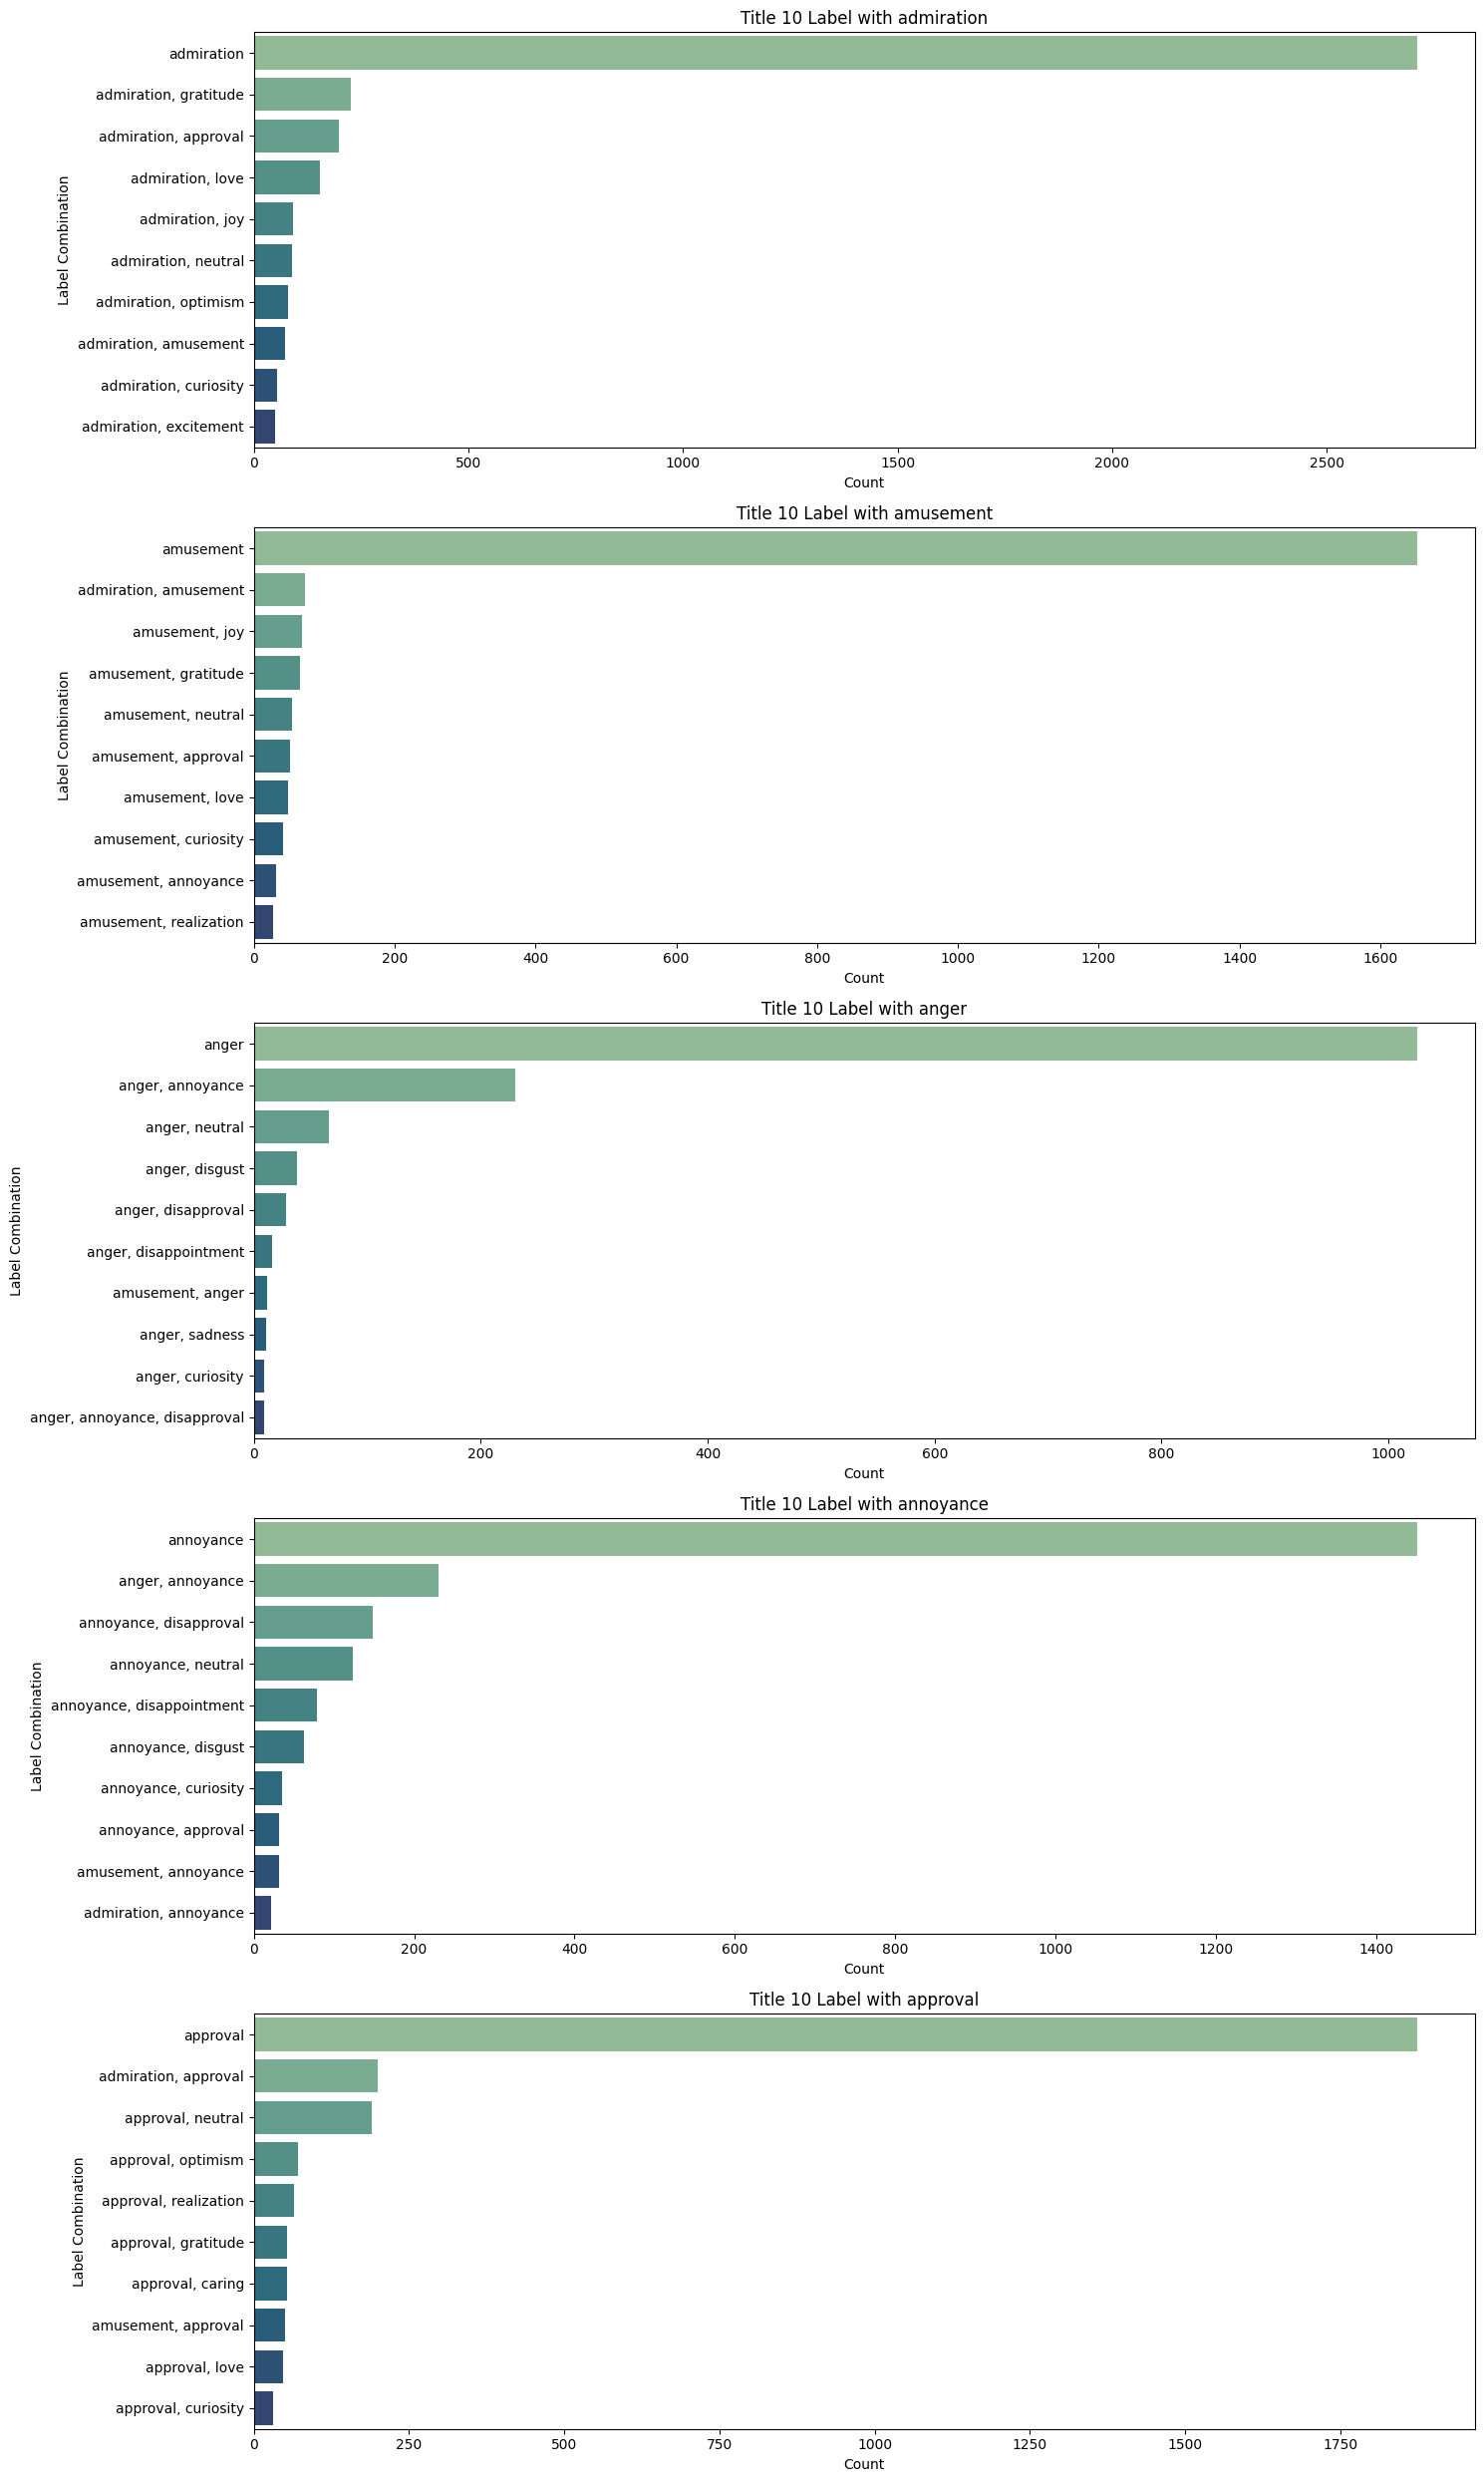

In [ ]:
def find_combination_label(target_label, labels):
    combinations = [tuple(sorted(label)) for label in labels if target_label in label]
    combi_count = Counter(combinations).most_common(10)

    data = {
        'Combination' : [', '.join([id2label[i] for i in combi]) for combi, _ in combi_count],
        'Count' : [count for _, count in combi_count]
    }

    return pd.DataFrame(data)

N = 5
label_ids = sorted(df_train['labels'].explode().unique())[:N]

plt.figure(figsize=(15, 5*N))

for idx, label_id in enumerate(label_ids, start=1):
    plt.subplot(N,1,idx)

    df_combi = find_combination_label(label_id, df_train['labels'])
    sns.barplot(data=df_combi, y='Combination', x='Count', palette='crest', hue='Combination', legend=False)
    plt.title(f'Title 10 Label with {id2label[label_id]}')
    plt.xlabel('Count')
    plt.ylabel('Label Combination')
    plt.tight_layout()
plt.show()

In [ ]:
label_count_with = []

for label_id in sorted(df_train['labels'].explode().unique()):
    subset = df_train[df_train['labels'].apply(lambda x: label_id in x)]

    co_labels = []
    for label in subset['labels']:
        co_labels.extend([l for l in label if l != label_id])

    co_count = Counter(co_labels)
    if co_count:
        most_common_label, count = co_count.most_common(1)[0]
        label_count_with.append({
            'label' : id2label[label_id],
            'Most_common_pair_label' : id2label[most_common_label],
            'Count' : count
        })
df_co = pd.DataFrame(label_count_with)
df_co

,label,Most_common_pair_label,Count
0,admiration,gratitude,279
1,amusement,joy,90
2,anger,annoyance,269
3,annoyance,anger,269
4,approval,admiration,246
5,caring,optimism,90
6,confusion,curiosity,212
7,curiosity,confusion,212
8,desire,optimism,64
9,disappointment,sadness,133


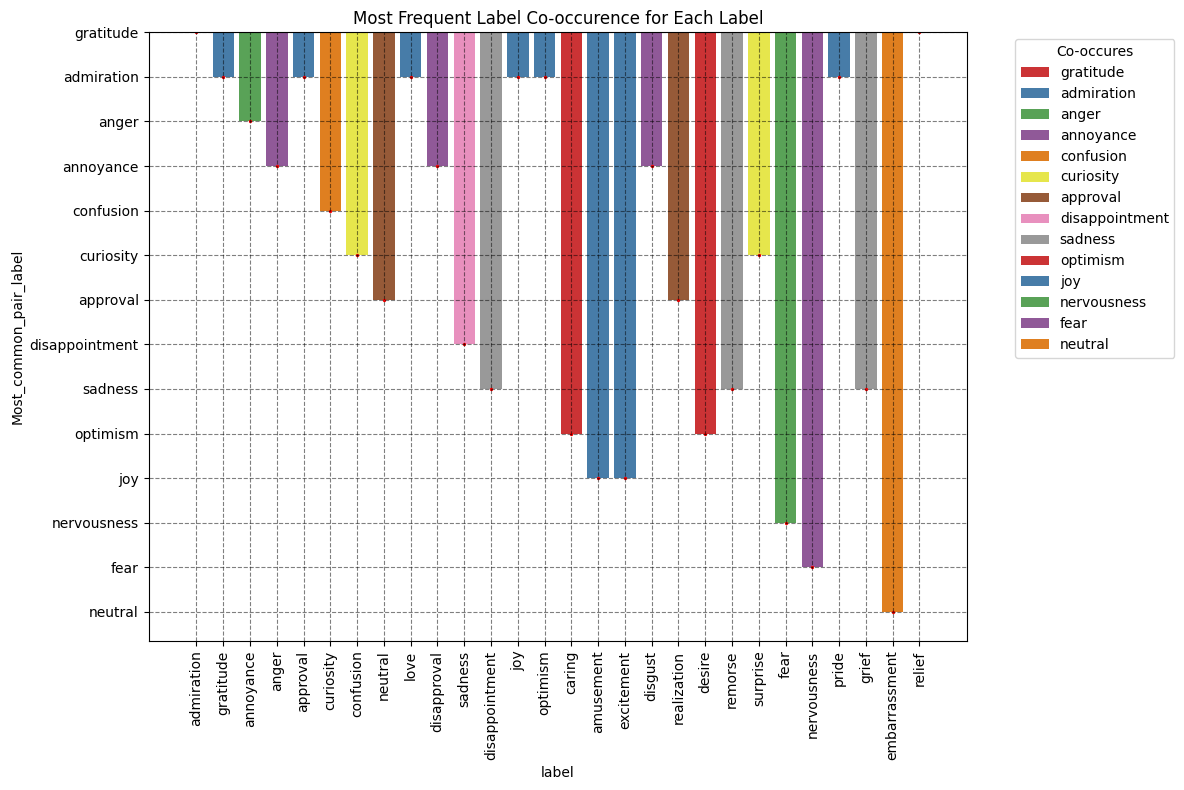

In [ ]:
plt.figure(figsize=(12,8))

sns.barplot(data=df_co.sort_values('Count', ascending=False), x='label', y='Most_common_pair_label', hue='Most_common_pair_label', palette='Set1', dodge=False)
plt.scatter(df_co['label'], df_co['Most_common_pair_label'], color='red', s=2)
#plt.text(df_co['label'],df_co['Most_common_pair_label'], str(df_co['Count']))
#for i, (label, count) in enumerate(zip(df_co['label'], df_co['Count'])):
#    plt.text(i, label, str(count), ha='center', va='bottom')
plt.title('Most Frequent Label Co-occurence for Each Label')
plt.xticks(rotation=90)
plt.legend(title='Co-occures', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis="both", linestyle="--", alpha=0.5, color='black')
plt.tight_layout()
plt.savefig(fname='image.png')
plt.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
mlb = MultiLabelBinarizer()

y_train = mlb.fit_transform(ds_train['labels'])
y_test = mlb.transform(ds_test['labels'])
y_valid = mlb.transform(ds_valid['labels'])

y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
mlb = MultiLabelBinarizer()

y_train = mlb.fit_transform(ds_train['labels'])
y_test = mlb.transform(ds_test['labels'])
y_valid = mlb.transform(ds_valid['labels'])

# Convert labels to float32
ds_train['labels'] = y_train.tolist()
ds_test['labels'] = y_test.tolist()
df_valid['labels'] = y_valid.tolist()

In [ ]:
df_train

,text,labels,id,label_names,num_labels
0,My favourite food is anything I didn't have to...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",eebbqej,[neutral],1
1,"Now if he does off himself, everyone will thin...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",ed00q6i,[neutral],1
2,WHY THE FUCK IS BAYLESS ISOING,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",eezlygj,[anger],1
3,To make her feel threatened,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",ed7ypvh,[fear],1
4,Dirty Southern Wankers,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",ed0bdzj,[annoyance],1
...,...,...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",edsb738,[love],1
43406,Always thought that was funny but is it a refe...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",ee7fdou,[confusion],1
43407,What are you talking about? Anything bad that ...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",efgbhks,[annoyance],1
43408,"More like a baptism, with sexy results!","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",ed1naf8,[excitement],1


In [ ]:
df_test

,text,labels,id
0,I’m really sorry about your situation :( Altho...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",eecwqtt
1,It's wonderful because it's awful. At not with.,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",ed5f85d
2,"Kings fan here, good luck to you guys! Will be...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",een27c3
3,"I didn't know that, thank you for teaching me ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",eelgwd1
4,They got bored from haunting earth for thousan...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",eem5uti
...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",efeeasc
5423,Well that makes sense.,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",ef9c7s3
5424,Daddy issues [NAME],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",efbiugo
5425,So glad I discovered that subreddit a couple m...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",efbvgp9
